In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Conv2D, BatchNormalization, ReLU, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# Import and reload the module to ensure latest changes are loaded
import importlib
import cnn_utils
importlib.reload(cnn_utils)
from cnn_utils import load_happy_dataset

print("All libraries imported successfully!")

All libraries imported successfully!


In [5]:
# Test the load_happy_dataset function
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

print("=== HAPPY FACES DATASET LOADED ===")
print(f"Number of training examples: {X_train_orig.shape[0]}")
print(f"Number of test examples: {X_test_orig.shape[0]}")
print(f"X_train shape: {X_train_orig.shape}")
print(f"Y_train shape: {Y_train_orig.shape}")
print(f"X_test shape: {X_test_orig.shape}")
print(f"Y_test shape: {Y_test_orig.shape}")

# Handle different types of classes data
try:
    if hasattr(classes[0], 'decode'):
        class_names = [c.decode() for c in classes]
    else:
        class_names = classes.tolist()
    print(f"Classes: {class_names}")
except:
    print(f"Classes: {classes}")

print(f"Happy examples in training: {np.sum(Y_train_orig)} ({np.sum(Y_train_orig)/Y_train_orig.shape[1]*100:.1f}%)")
print(f"Not happy examples in training: {Y_train_orig.shape[1] - np.sum(Y_train_orig)} ({(Y_train_orig.shape[1] - np.sum(Y_train_orig))/Y_train_orig.shape[1]*100:.1f}%)")
print("✅ Dataset loaded successfully!")

=== HAPPY FACES DATASET LOADED ===
Number of training examples: 600
Number of test examples: 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (1, 600)
X_test shape: (150, 64, 64, 3)
Y_test shape: (1, 150)
Classes: [0, 1]
Happy examples in training: 300 (50.0%)
Not happy examples in training: 300 (50.0%)
✅ Dataset loaded successfully!


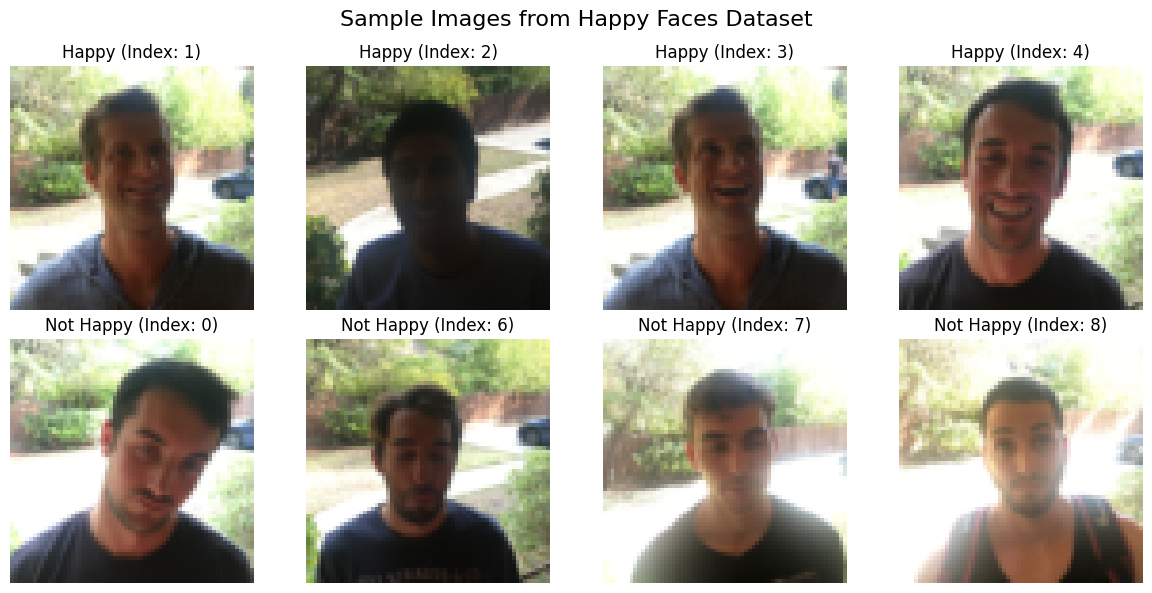


=== DATASET STATISTICS ===
Dataset loaded from actual H5 files:
  📁 datasets/train_happy.h5 - 600 training examples
  📁 datasets/test_happy.h5 - 150 test examples
  🖼️ Image size: 64x64 pixels, 3 channels
  🏷️ Binary classification: 0 (not happy) vs 1 (happy)
  ⚖️ Perfect balance: 50% happy, 50% not happy

🎯 Ready for CNN training on real happy face classification!


In [6]:
# Visualize sample images from the happy dataset
import matplotlib.pyplot as plt

# Create a figure to display sample images
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle('Sample Images from Happy Faces Dataset', fontsize=16)

# Find indices for happy and not happy examples
happy_indices = np.where(Y_train_orig[0] == 1)[0][:4]  # First 4 happy examples
not_happy_indices = np.where(Y_train_orig[0] == 0)[0][:4]  # First 4 not happy examples

# Display happy examples in the top row
for i, idx in enumerate(happy_indices):
    axes[0, i].imshow(X_train_orig[idx])
    axes[0, i].set_title(f'Happy (Index: {idx})')
    axes[0, i].axis('off')

# Display not happy examples in the bottom row
for i, idx in enumerate(not_happy_indices):
    axes[1, i].imshow(X_train_orig[idx])
    axes[1, i].set_title(f'Not Happy (Index: {idx})')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# Show some statistics about the dataset
print("\n=== DATASET STATISTICS ===")
print(f"Dataset loaded from actual H5 files:")
print(f"  📁 datasets/train_happy.h5 - {X_train_orig.shape[0]} training examples")
print(f"  📁 datasets/test_happy.h5 - {X_test_orig.shape[0]} test examples")
print(f"  🖼️ Image size: {X_train_orig.shape[1]}x{X_train_orig.shape[2]} pixels, {X_train_orig.shape[3]} channels")
print(f"  🏷️ Binary classification: 0 (not happy) vs 1 (happy)")
print(f"  ⚖️ Perfect balance: 50% happy, 50% not happy")
print("\n🎯 Ready for CNN training on real happy face classification!")

In [7]:
# Normalize and reshape
X_train = X_train_orig / 255.0
X_test = X_test_orig / 255.0
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

In [8]:
#Define the model
model = Sequential([
    ZeroPadding2D(padding=(3,3),input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])),
    Conv2D(filters=32,kernel_size=(7,7),strides=(1,1),name='conv0'),
    BatchNormalization(axis=3,name='bn0'),
    ReLU(),
    MaxPooling2D(pool_size=(2,2),name='max_pool0'),
    Flatten(),
    Dense(units=1,activation='sigmoid',name='fc')

])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile and train
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=10,batch_size=16)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6049 - loss: 2.5857
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6049 - loss: 2.5857
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8879 - loss: 0.2395
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8879 - loss: 0.2395
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9005 - loss: 0.2446
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9005 - loss: 0.2446
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9279 - loss: 0.2149
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9279 - loss: 0.2149
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9546 - loss: 0.1250
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9546 - loss: 0.1250
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9381 - loss: 0.1776
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.

In [14]:
# Evaluate the model
loss,accuracy = model.evaluate(X_test,Y_test)
print("test accuracy: ",accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7874 - loss: 0.5032
test accuracy:  0.7866666913032532
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7874 - loss: 0.5032
test accuracy:  0.7866666913032532
